# Figure 1

In [1]:
import pickle
import matplotlib.pyplot as plt
import sys
sys.path.append("../../") # go to parent dir
from pydune.pydune import Profile

In [2]:
# Plotting Paramaters
params = {'legend.fontsize': 12,
           'axes.labelsize': 14,
           'axes.labelweight': 'bold',
           'axes.titlesize': 14,
           'axes.titleweight': 'bold',
           'xtick.labelsize': 14,
           'ytick.labelsize': 14,
           'mathtext.default':'regular'}
plt.rcParams.update(params)

In [9]:
# Load data
with open('../../data/SR04_test.pkl', 'rb') as f:
    SR04_data = pickle.load(f)
x, z, toe = SR04_data['x'], SR04_data['z'], SR04_data['toe']
# Instantiate class
p = Profile(x, z)

In [10]:
# Make predictions
toe_ml, prob_ml = p.predict_dunetoe_ml('SR04_clf')
toe_mc = p.predict_dunetoe_mc()
toe_rr = p.predict_dunetoe_rr(21, 0.3)
toe_pd = p.predict_dunetoe_pd()
crest = p.predict_dunecrest()
shoreline = p.predict_shoreline()

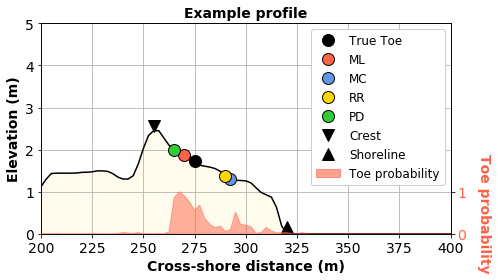

In [11]:
n = 9 # profile to plot

fig, axes = plt.subplots(1, 1, figsize=(7, 4))
toes = [toe[n]-1, toe_ml[n]+1, toe_mc[n], toe_rr[n]-2, toe_pd[n]]
labels = ['True Toe', 'ML', 'MC', 'RR', 'PD']
colors = ['k', 'tomato', 'cornflowerblue', 'gold', 'limegreen']

axes.set_title(f'Example profile')
axes.plot(p.x, p.z[n], '-k')
axes.fill_between(p.x, p.z[n], color='cornsilk', alpha=0.5)
axes.axvspan(-10, -9, color='tomato', alpha = 0.6, label='Toe probability') # legend placeholder
for i, itoe in enumerate(toes): 
    axes.plot(p.x[itoe], p.z[n, itoe],
              'o', color=colors[i], ms=12, mec='k', label=labels[i])
axes.plot(p.x[crest[n]], p.z[n, crest[n]]+0.12, 'v', color='k', ms=12, mec='k', label='Crest')
axes.plot(p.x[shoreline[n]], p.z[n, shoreline[n]]+0.15, '^', color='k', ms=12, mec='k', label='Shoreline')
axes.set_xlim(200, 400)
axes.set_ylim(0, 5)
axes.set_xlabel('Cross-shore distance (m)')
axes.set_ylabel('Elevation (m)')
axes.grid()
axes.legend(framealpha=1)

axes2 = axes.twinx() 
axes2.fill_between(p.x, prob_ml[n,], color='tomato', alpha=0.5)
axes2.set_ylim(0, 5)
axes2.set_yticks([0, 1])
axes2.tick_params(axis='y', labelcolor='tomato')
axes2.yaxis.set_label_coords(1.1, 0.1)
axes2.set_ylabel('Toe probability', color='tomato', rotation=270)

plt.tight_layout()

In [13]:
fig.savefig('../figure_1.png', dpi=300)